In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [154]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-23 06:02:21,534 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-23 06:02:22,002 - settings - Setting enable_python_native_blobs to True


In [149]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

# Getting the list of cells that are proofread

In [5]:
# manually_proofread_cells = ((m65.UnitSeedGroup & 'group_method_id!=5' & 'group_method_id!=6') * 
#  (du.m65mat.ProofreadFunctionalCoregV2 & 'ver=43')).fetch('nucleus_id')

In [6]:
manually_proofread_cells.shape

(74,)

In [11]:
validation_folder = Path("./aug_syn_files/")
val_file_names = list(validation_folder.iterdir())
val_segment_ids = [int(k.stem) for k in val_file_names]

In [131]:
curr_index = 2 #worked but had some errors
curr_index = 5
curr_index = 7
current_file = val_file_names[curr_index]
original_segment_id = val_segment_ids[curr_index]
original_segment_id

864691135382947307

In [140]:
viable_proofread_ids = []
for v_seg in val_segment_ids:
    if v_seg in aug_to_v7_table["old_seg_id"].to_list():
        viable_proofread_ids.append(v_seg)

In [ ]:
minnie.AutoProo

In [151]:
@schema
class AutoProofreadValidationSegment(dj.Manual):
    definition="""
    segment_id : bigint unsigned  #segment id for those to be decimated
    ---
    """
AutoProofreadValidationSegment.insert([dict(segment_id=k) for k in viable_proofread_ids ],skip_duplicates=True)
AutoProofreadValidationSegment()

segment_id segment id for those to be decimated
864691134988386682
864691135113167769
864691135212632448
864691135212690816
864691135233108569
864691135272164113
864691135348272855
864691135382947307
864691135393964789
864691135407289801


In [171]:
#minnie.Decimation() & [dict(segment_id = k,decimation_ratio=0.25) for k in viable_proofread_ids]
minnie.BaylorSegmentCentroid() & minnie.AutoProofreadValidationSegment()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),soma_index index given to this soma to account for multiple somas in one base semgnet,ver the version number of the materializaiton,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),n_vertices number of vertices,n_faces number of faces,mesh datajoint adapter to get the somas mesh objects,multiplicity the number of somas found for this base segment,sdf sdf width value for the soma,volume the volume in billions (10*9 nm^3) of the convex hull,max_side_ratio the maximum of the side length ratios used for check if soma,bbox_volume_ratio ratio of bbox (axis aligned) volume to mesh volume to use for check if soma,max_hole_length euclidean distance of the maximum hole size,run_time the amount of time to run (seconds)
864691134988386682,0,0.25,1,30.00,167761,216368,21535,17788,35345,=BLOB=,1,0.825,1056.0260786820209,1.207,3.438,92525.151,161.5323
864691135113167769,0,0.25,1,30.00,198908,188769,19783,18514,36542,=BLOB=,1,0.812,1104.04545624775,1.112,4.79,44938.074,143.6072
864691135212632448,0,0.25,1,30.00,185376,185168,21263,21846,42977,=BLOB=,1,0.884,1300.7849446221405,1.08,3.515,453604.973,350.5574
864691135212690816,0,0.25,1,30.00,302290,177804,16306,17923,35454,=BLOB=,1,0.799,1094.566709208948,1.238,3.678,58953.479,203.3104
864691135233108569,0,0.25,1,30.00,168040,161943,21497,11709,23189,=BLOB=,1,0.87,635.4723200280364,1.193,3.9,91026.718,111.9404
864691135272164113,0,0.25,1,30.00,278510,169276,25204,26264,51924,=BLOB=,1,0.869,1869.916601659797,1.156,5.288,131685.405,250.5538
864691135348272855,0,0.25,1,30.00,298452,166437,24620,23595,46821,=BLOB=,1,0.883,1633.0386249881665,1.047,4.726,136186.718,425.1059
864691135382947307,0,0.25,1,30.00,320736,155412,25496,19154,65667,=BLOB=,1,0.668,1222.171227753875,1.235,4.061,62552.982,327.1034
864691135393964789,0,0.25,1,30.00,202255,168030,17807,14394,28490,=BLOB=,1,0.88,646.0492020415586,1.424,4.224,46207.27,546.3722
864691135407289801,0,0.25,1,30.00,324280,130720,20751,18951,37196,=BLOB=,1,0.844,1061.9157268738854,1.133,4.092,1114347.503,339.5644


In [173]:
du.plot_decimated_mesh_with_somas(864691136537220258)

Segment_id = 864691136537220258
vertices = 680208, faces= = 1355519
No glia to plot
subtracting glia and nuclei
curr_colors = ['red']
curr_soma_meshes_filtered = [<trimesh.Trimesh(vertices.shape=(22370, 3), faces.shape=(44377, 3))>]
other_meshes_to_plot = []


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [183]:
seg_id = 864691135113167769


In [184]:
neuron_obj = ((minnie.Decomposition() & minnie.AutoProofreadValidationSegment()) & dict(segment_id=seg_id)).fetch1("decomposition")

Decompressing Neuron in minimal output mode...please wait


In [185]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


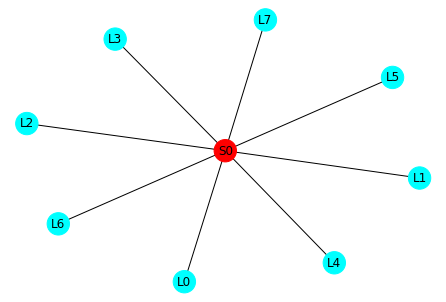

In [186]:
nviz.plot_soma_limb_concept_network(neuron_obj)

In [187]:
import proofreading_utils as pru
import classification_utils as clu

In [188]:
clu.axon_classification(neuron_obj,
                       best_axon=True,
                       plot_axon_errors=True,
                       plot_axons=True)


Part 1: Axon like branchese 
{'L0': array([ 0,  1,  5,  6, 10, 13, 14, 17, 18, 19, 20, 21, 22, 23, 25, 26, 31]), 'L1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70]), 'L2': array([3, 7]), 'L5': array([3, 5, 6, 7]), 'L6': array([0, 4])}
Limb L0 soma angle: 10.05 
Limb L1 soma angle: 170.96 
Limb L2 soma angle: 122.86 
Limb L3 soma angle: 119.17 
Limb L4 soma angle: 98.09 
Limb L5 soma angle: 125.56 
Limb L6 soma angle: 136.04 
Limb L7 soma angle: 21.85 

Part 2: possible_axon_limbs = [1, 2, 3, 4, 5, 6]

Phase 2: Working on Limb L1
nodes_to_eliminate = []

Phase 2: Working on Limb L2
nodes_to_eliminate = [ 8  9 10]

Phase 2: Working on Limb L3
nodes_to_eliminate = [2]

Phase 2: Working on Limb L4
nodes_to_eliminate = [


 Working on visualization type: mesh


({'L1': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
         26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
         39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
         52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
         65., 66., 67., 68., 69., 70.])},
 {'L0': array([ 0,  1,  5,  6, 10, 14, 17, 18, 19, 21, 22, 23, 25, 26, 31]),
  'L2': array([7]),
  'L5': array([3, 5, 6, 7]),
  'L6': array([0, 4])})

In [169]:
dj.config["display.limit"] = 70
curr_table = (minnie.schema.jobs & "table_name='__baylor_segment_centroid'")
((curr_table) & "timestamp>'2021-02-22'")

INFO - 2021-02-23 07:03:37,592 - settings - Setting display.limit to 70


table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [132]:
# 2) Get the matching v7 id
import pandas as pd
aug_to_v7_table = pd.read_csv("./proofread_cells_seg_correspondence_Aug1-v7.csv")
v7_id = aug_to_v7_table[aug_to_v7_table["old_seg_id"]==original_segment_id]["new_seg_id"].tolist()[0]
v7_id

864691135593659947

In [133]:
import system_utils as su
curr_synapse_table = su.load_object(current_file)
curr_synapse_table

,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_root_id_Aug,post_pt_root_id_Aug
0,324236077,True,"[277230, 170582, 27809]",102893811633673884,864691135593659947,"[277260, 170606, 27810]","[277262, 170586, 27812]",102893811633680166,864691134443734171,2812.0,8.646911e+17,8.646911e+17
1,333807840,True,"[278530, 170754, 27769]",103034617841471953,864691135593659947,"[278604, 170772, 27765]","[278594, 170844, 27768]",103104986585640541,864691135457218117,15672.0,8.646911e+17,8.646911e+17
2,334069662,True,"[280600, 170450, 27596]",103316024031960459,864691135593659947,"[280598, 170380, 27595]","[280600, 170328, 27601]",103316024031963299,864691135455599429,8364.0,8.646911e+17,8.646911e+17
3,344181718,True,"[287218, 171000, 27164]",104230886425303347,864691135593659947,"[287184, 170974, 27161]","[287178, 170926, 27170]",104230886425313065,864691136917360750,11916.0,8.646911e+17,8.646911e+17
4,348100227,True,"[288688, 171386, 27086]",104442061310689631,864691135593659947,"[288694, 171312, 27089]","[288648, 171288, 27086]",104442061310687104,864691136116186788,8892.0,8.646911e+17,8.646911e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
447,439304667,True,"[346760, 149266, 24656]",112461142940576652,864691136214992574,"[346752, 149322, 24656]","[346818, 149376, 24659]",112461142940575532,864691135593659947,12316.0,8.646911e+17,8.646911e+17
448,439304686,True,"[346760, 149948, 24597]",112461211659986932,864691135775886765,"[346757, 149915, 24588]","[346700, 149910, 24582]",112461211659939899,864691135593659947,1204.0,8.646911e+17,8.646911e+17
449,439304695,True,"[346850, 149970, 24577]",112461211593476546,864691135598708707,"[346776, 149932, 24581]","[346736, 149928, 24581]",112461211659965896,864691135593659947,23500.0,8.646911e+17,8.646911e+17
450,439305184,True,"[347260, 150030, 24621]",112531580404199760,864691136005508235,"[347302, 150038, 24628]","[347272, 150048, 24631]",112531580404212730,864691135593659947,9080.0,8.646911e+17,8.646911e+17


In [134]:
#eliminating the self connections
df_pre_filt = curr_synapse_table[(curr_synapse_table["pre_pt_root_id_Aug"] != curr_synapse_table["post_pt_root_id_Aug"]) & 
                                (curr_synapse_table["pre_pt_root_id"] != curr_synapse_table["post_pt_root_id"]) ]
df_pre_filt

,id,valid,pre_pt_position,pre_pt_supervoxel_id,pre_pt_root_id,ctr_pt_position,post_pt_position,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_root_id_Aug,post_pt_root_id_Aug
0,324236077,True,"[277230, 170582, 27809]",102893811633673884,864691135593659947,"[277260, 170606, 27810]","[277262, 170586, 27812]",102893811633680166,864691134443734171,2812.0,8.646911e+17,8.646911e+17
1,333807840,True,"[278530, 170754, 27769]",103034617841471953,864691135593659947,"[278604, 170772, 27765]","[278594, 170844, 27768]",103104986585640541,864691135457218117,15672.0,8.646911e+17,8.646911e+17
2,334069662,True,"[280600, 170450, 27596]",103316024031960459,864691135593659947,"[280598, 170380, 27595]","[280600, 170328, 27601]",103316024031963299,864691135455599429,8364.0,8.646911e+17,8.646911e+17
3,344181718,True,"[287218, 171000, 27164]",104230886425303347,864691135593659947,"[287184, 170974, 27161]","[287178, 170926, 27170]",104230886425313065,864691136917360750,11916.0,8.646911e+17,8.646911e+17
4,348100227,True,"[288688, 171386, 27086]",104442061310689631,864691135593659947,"[288694, 171312, 27089]","[288648, 171288, 27086]",104442061310687104,864691136116186788,8892.0,8.646911e+17,8.646911e+17
...,...,...,...,...,...,...,...,...,...,...,...,...
447,439304667,True,"[346760, 149266, 24656]",112461142940576652,864691136214992574,"[346752, 149322, 24656]","[346818, 149376, 24659]",112461142940575532,864691135593659947,12316.0,8.646911e+17,8.646911e+17
448,439304686,True,"[346760, 149948, 24597]",112461211659986932,864691135775886765,"[346757, 149915, 24588]","[346700, 149910, 24582]",112461211659939899,864691135593659947,1204.0,8.646911e+17,8.646911e+17
449,439304695,True,"[346850, 149970, 24577]",112461211593476546,864691135598708707,"[346776, 149932, 24581]","[346736, 149928, 24581]",112461211659965896,864691135593659947,23500.0,8.646911e+17,8.646911e+17
450,439305184,True,"[347260, 150030, 24621]",112531580404199760,864691136005508235,"[347302, 150038, 24628]","[347272, 150048, 24631]",112531580404212730,864691135593659947,9080.0,8.646911e+17,8.646911e+17


In [135]:
table_to_analyze = df_pre_filt
post_neurons_old = np.array(table_to_analyze["post_pt_root_id_Aug"].to_numpy()).astype("float64")
pre_neurons_old = np.array(table_to_analyze["pre_pt_root_id_Aug"].to_numpy()).astype("float64")
pre_indexes_old = np.where(pre_neurons_old == original_segment_id)[0]
post_indexes_old = np.where(post_neurons_old == original_segment_id)[0]

pre_indexes_old.shape, post_indexes_old.shape

((83,), (2634,))

In [136]:
table_to_analyze = df_pre_filt
post_neurons = np.array(table_to_analyze["post_pt_root_id"].to_numpy()).astype("float64")
pre_neurons = np.array(table_to_analyze["pre_pt_root_id"].to_numpy()).astype("float64")
pre_indexes= np.where(pre_neurons == v7_id)[0]
post_indexes = np.where(post_neurons == v7_id)[0]

pre_indexes.shape, post_indexes.shape

((50,), (2633,))

# Visualizing the Synapses that remain

In [137]:
curr_mesh = du.fetch_segment_id_mesh(original_segment_id)

In [138]:
vu.plot_classified_synapse_df_on_mesh(
    neuron_mesh = curr_mesh,
    synapse_df = df_pre_filt,
    segment_id_original = original_segment_id,
    segment_id_proofread = v7_id,
    synapses_type_to_plot=["valid_syn_centers_presyn",
                          "errored_syn_centers_presyn"],
    plot_error_synapses=True,
    synapses_type_to_not_plot = None,
    verbose=True,
synapse_scatter_size=0.4,
valid_presyn_color="black",
valid_postsyn_color="aqua",
error_presyn_color="red",
error_postsyn_color="orange",)

len(valid_syn_centers_presyn_df) = 50
len(valid_syn_centers_postsyn_df) = 2633
len(errored_syn_centers_presyn_df) = 33
len(errored_syn_centers_postsyn_df) = 1


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [129]:
import ipyvolume as ipv

In [130]:
ipv.pylab.save(f"{original_segment_id}_presyn_manual_proofread_no_missed_axon_merges.html")

# Applying the Proofreading To the Synapses

In [ ]:
"""


"""

# Loading the synapse data from forrest

In [ ]:
# 1) Get the synapse file that corresponds to it
data_path = Path("./manual_proofread_data/")
current_file = data_path / Path(f"{segment_id}.pkl")
current_file

In [ ]:
import system_utils as su
curr_synapse_table = su.load_object(current_file)
#eliminating the self connections
df_pre_filt = curr_synapse_table[curr_synapse_table["pre_pt_root_id_Aug"] != curr_synapse_table["post_pt_root_id_Aug"]]
df_pre_filt